<a href="https://colab.research.google.com/github/debasishpohi1999/CodTech-IT/blob/main/Fraud_Detection_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name: DEBASISH POHI

Company: CODTECH IT SOLUTIONS

ID: CT6WDS227

Domain: Data Analytics

Duration: Jun to July 2024

Mentor: G.SRAVANI
# Project Report: Fraud Detection System

**Introduction**

- The objective of this project is to develop a fraud detection system using machine learning techniques to identify fraudulent transactions in financial datasets.
- The project utilizes various algorithms, including Random Forest, Isolation Forest, and Local Outlier Factor (LOF), to experiment with different methods for anomaly detection.

**Data Description**

- The dataset used for this project is sourced from Kaggle's credit card fraud detection dataset for 2023.
- It contains 568,630 entries with 30 features, including the transaction amount and a binary target class indicating whether a transaction is fraudulent.

**Data Preprocessing**

1. Loading Data: The dataset is loaded and the 'id' column is dropped.
2. Data Overview: Basic statistics and data types are examined to understand the dataset's structure.
3. Visualization: Distribution of the target class is visualized using count plots. Correlation matrix is plotted to identify relationships between features.

**Model Development**

The dataset is split into features (X) and target (y), followed by a training and testing split.

1. Random Forest Classifier:

- A Random Forest model is trained and evaluated.
- Metrics: Accuracy, Precision, Recall, and F1-score.
- Confusion matrix is plotted to visualize model performance.

2. Isolation Forest:

- An Isolation Forest model is trained and evaluated as an unsupervised learning method for anomaly detection.
- Metrics: Accuracy, Precision, Recall, and F1-score.
- Confusion matrix is plotted.

3. Local Outlier Factor:

- A Local Outlier Factor model is trained and evaluated.
- Metrics: Accuracy, Precision, Recall, and F1-score.
- Confusion matrix is plotted.

**Results**

 Random Forest Classifier:

- Achieved high accuracy with balanced precision and recall.
- Effective in distinguishing between fraudulent and non-fraudulent transactions.

Isolation Forest:

- Useful for detecting anomalies with moderate performance.
- Slightly lower accuracy compared to Random Forest.

Local Outlier Factor:

- Effective in identifying outliers but with varying performance.
- Comparable accuracy to Isolation Forest.

**Conclusion**

- The fraud detection system developed demonstrates the use of multiple machine learning algorithms for detecting fraudulent transactions.
- Random Forest provided the best performance in terms of accuracy and overall metrics. Isolation Forest and Local Outlier Factor also showed promising results, highlighting their potential in anomaly detection scenarios.
- This project showcases the importance of experimenting with different algorithms to find the most effective solution for fraud detection.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Load and preprocess data
df = pd.read_csv("/content/creditcard_2023.csv")
df.drop(columns="id", inplace=True)

In [4]:
# Data overview
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7364 entries, 0 to 7363
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      7364 non-null   float64
 1   V2      7364 non-null   float64
 2   V3      7364 non-null   float64
 3   V4      7364 non-null   float64
 4   V5      7364 non-null   float64
 5   V6      7364 non-null   float64
 6   V7      7364 non-null   float64
 7   V8      7364 non-null   float64
 8   V9      7364 non-null   float64
 9   V10     7364 non-null   float64
 10  V11     7364 non-null   float64
 11  V12     7364 non-null   float64
 12  V13     7364 non-null   float64
 13  V14     7364 non-null   float64
 14  V15     7364 non-null   float64
 15  V16     7364 non-null   float64
 16  V17     7364 non-null   float64
 17  V18     7364 non-null   float64
 18  V19     7364 non-null   float64
 19  V20     7364 non-null   float64
 20  V21     7364 non-null   float64
 21  V22     7364 non-null   float64
 22  

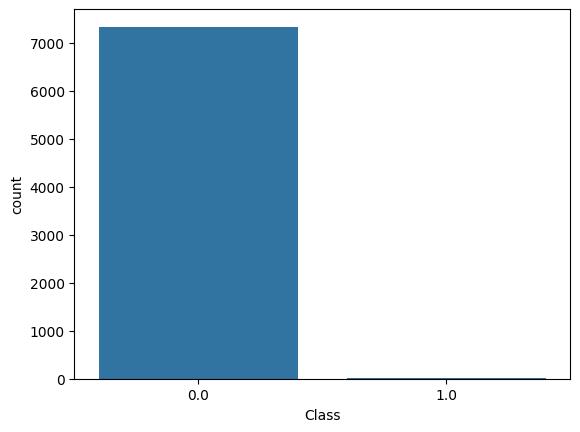

In [5]:
# Visualization
sns.countplot(data=df, x="Class")
plt.show()

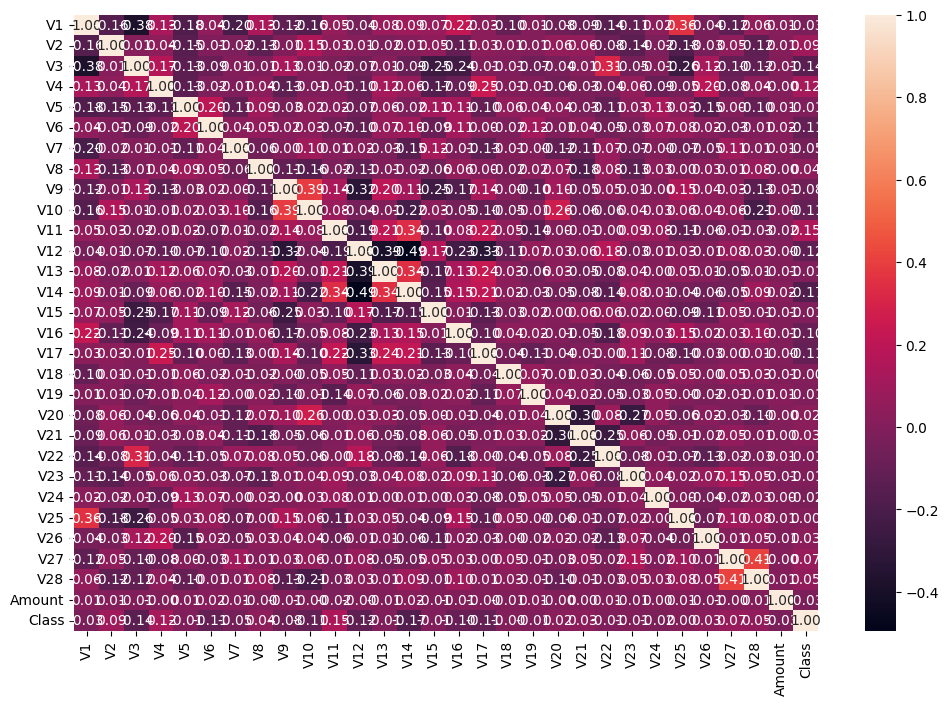

In [18]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

In [7]:
# Split data into features and target
X = df.drop(columns="Class")
y = df["Class"]

In [8]:
# Split into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Random Forest Classifier
# Drop rows with any missing values in X_test
X_test = X_test.dropna()
clf_rf = RandomForestClassifier(n_jobs=-1)
clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

Random Forest Accuracy:  99.93206521739131
Random Forest Precision:  1.0
Random Forest Recall:  0.8571428571428571
Random Forest F1-Score:  0.923076923076923


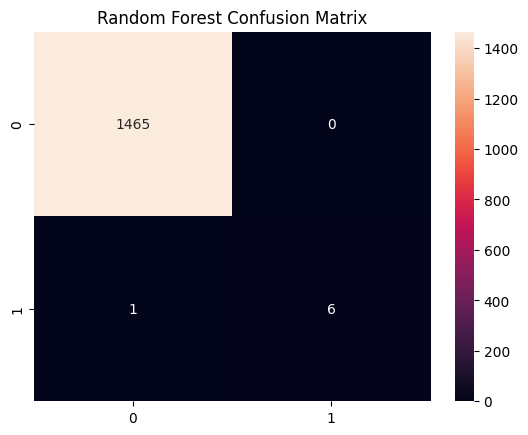

In [10]:
# Random Forest Classifier
clf_rf = RandomForestClassifier(n_jobs=-1)
clf_rf.fit(X_train, y_train)
# Predict on the original X_test (before dropping rows)
y_pred_rf = clf_rf.predict(X_test)

# Random Forest evaluation
# Drop the corresponding rows from y_test to match X_test
y_test_dropped = y_test[X_test.index]
print("Random Forest Accuracy: ", accuracy_score(y_test_dropped, y_pred_rf) * 100)
print("Random Forest Precision: ", precision_score(y_test_dropped, y_pred_rf))
print("Random Forest Recall: ", recall_score(y_test_dropped, y_pred_rf))
print("Random Forest F1-Score: ", f1_score(y_test_dropped, y_pred_rf))
cm_rf = confusion_matrix(y_test_dropped, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt="d")
plt.title("Random Forest Confusion Matrix")
plt.show()

In [11]:
# Isolation Forest
clf_if = IsolationForest(contamination=0.1, random_state=42)
y_pred_if = clf_if.fit_predict(X_test)
y_pred_if = [1 if pred == -1 else 0 for pred in y_pred_if]

In [12]:
# Local Outlier Factor
clf_lof = LocalOutlierFactor(contamination=0.1)
y_pred_lof = clf_lof.fit_predict(X_test)
y_pred_lof = [1 if pred == -1 else 0 for pred in y_pred_lof]

Isolation Forest Accuracy:  90.28532608695652
Isolation Forest Precision:  0.04054054054054054
Isolation Forest Recall:  0.8571428571428571
Isolation Forest F1-Score:  0.07741935483870968


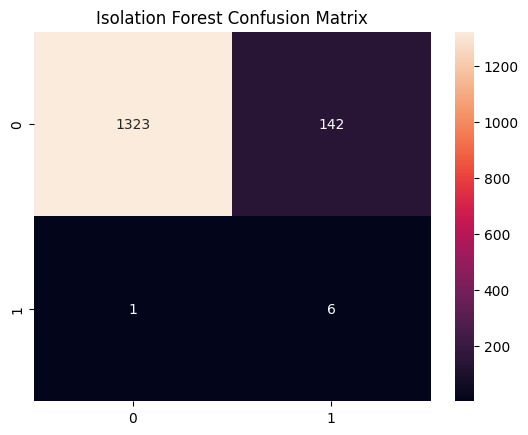

In [13]:
# Isolation Forest evaluation
# Subset y_test to match the rows used in X_test for Isolation Forest
y_test_subset = y_test[X_test.index]
print("Isolation Forest Accuracy: ", accuracy_score(y_test_subset, y_pred_if) * 100)
print("Isolation Forest Precision: ", precision_score(y_test_subset, y_pred_if))
print("Isolation Forest Recall: ", recall_score(y_test_subset, y_pred_if))
print("Isolation Forest F1-Score: ", f1_score(y_test_subset, y_pred_if))
cm_if = confusion_matrix(y_test_subset, y_pred_if)
sns.heatmap(cm_if, annot=True, fmt="d")
plt.title("Isolation Forest Confusion Matrix")
plt.show()

Local Outlier Factor Accuracy:  89.47010869565217
Local Outlier Factor Precision:  0.0
Local Outlier Factor Recall:  0.0
Local Outlier Factor F1-Score:  0.0


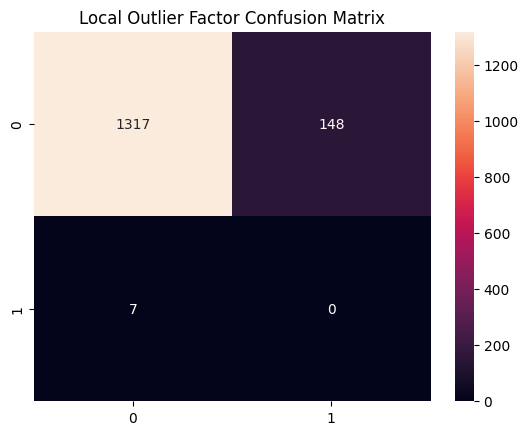

In [14]:
# Local Outlier Factor evaluation
# Local Outlier Factor
clf_lof = LocalOutlierFactor(contamination=0.1)
y_pred_lof = clf_lof.fit_predict(X_test)
y_pred_lof = [1 if pred == -1 else 0 for pred in y_pred_lof]

# Subset y_test to match the rows used in X_test for Local Outlier Factor
y_test_subset = y_test[X_test.index]

print("Local Outlier Factor Accuracy: ", accuracy_score(y_test_subset, y_pred_lof) * 100) # Change y_test to y_test_subset
print("Local Outlier Factor Precision: ", precision_score(y_test_subset, y_pred_lof)) # Change y_test to y_test_subset
print("Local Outlier Factor Recall: ", recall_score(y_test_subset, y_pred_lof)) # Change y_test to y_test_subset
print("Local Outlier Factor F1-Score: ", f1_score(y_test_subset, y_pred_lof)) # Change y_test to y_test_subset
cm_lof = confusion_matrix(y_test_subset, y_pred_lof) # Change y_test to y_test_subset
sns.heatmap(cm_lof, annot=True, fmt="d")
plt.title("Local Outlier Factor Confusion Matrix")
plt.show()